## create variables

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets

### variables

In [374]:
# House Price
price=800000
# Down Payment
downPayment=200000
# Down payment percent
downPcnt=downPayment/price
# Loan Amount
loanAmt= price-downPayment
# Annual Interest Rate (percent%)
interestRate= 7.21
# Life of Loan (Years) aka: Loan term
loanTerm= 30
# Number of Payments per Year
nAnnualPayments= 12
# Interest Total Cost
interestCost=(interestRate/100)*loanAmt
# Monthly mortgage
#mortgageMonthly=(loanAmt+interestCost)/(loanTerm*nAnnualPayments)
#mortgageInterestYearly=interestCost/(loanTerm*nAnnualPayments)

# propTax (percent)
taxYearly=price*(18.42/1000)
taxMonthly=tax/12
# Insurance (percent)
insurancePcnt= .04
#Monthly insurance
insuranceYearly=price*insurancePcnt
# HOA (monthly)
hoaYearly=360*12

# Yearly income
incomeAnnual=300000

# Annual house appreciation
pctAnnualGrowth=.05

### Amortization schedule averaged years

In [341]:
def calculate_amortization_schedule(loan_amount, annual_rate, loan_term_years):
    monthly_rate = annual_rate / 100 / 12
    total_payments = loan_term_years * 12

    # Calculate fixed monthly mortgage payment
    monthly_payment = loan_amount * monthly_rate / (1 - (1 + monthly_rate) ** -total_payments)

    schedule = []
    balance = loan_amount

    for month in range(1, total_payments + 1):
        interest = balance * monthly_rate
        principal = monthly_payment - interest
        balance -= principal

        schedule.append({
            "Month": month,
            "Payment": round(monthly_payment, 2),
            "Principal": round(principal, 2),
            "Interest": round(interest, 2),
            "Balance": round(balance if balance > 0 else 0, 2)
        })

    return schedule


def average_chunks(X, chunk_size=12):
    """
    Averages every `chunk_size` consecutive items in list X.

    :param X: List of numbers (length must be divisible by chunk_size)
    :param chunk_size: Number of items to average together
    :return: List of averaged values
    """
    if len(X) % chunk_size != 0:
        raise ValueError("List length must be divisible by chunk size.")

    return [
        sum(X[i:i + chunk_size]) / chunk_size
        for i in range(0, len(X), chunk_size)
    ]

def Sum_years(sched,Var):
    Val=get_values_from_key(sched,Var)
    return average_chunks(Val, chunk_size=12)




### Make equation for growth

In [337]:
def calc_investment_growth(price, pctAnnualGrowth, y, compounds_per_year=1):
    """
    Calculates the future value of an investment using compound interest.

    :param price: Initial investment amount (P)
    :param pctAnnualGrowth: Annual interest rate (in percent, e.g. 5 for 5%)
    :param y: Number of years the money is invested (t)
    :param compounds_per_year: Number of times interest is compounded per year (n)
    :return: Future value of the investment (A)
    """
    growth = (price * (1 + pctAnnualGrowth / compounds_per_year) ** (compounds_per_year * y))-price
    return growth

In [338]:
def create_growthChart(n):
    yearList=range(n)
    growthChart = []
    for x in yearList:
        growthChart.append(round(calc_investment_growth(price, pctAnnualGrowth, x, compounds_per_year=1)))
    return growthChart

### Schedule

In [342]:
schedule=calculate_amortization_schedule(loanAmt, interestRate, loanTerm)

### Mortgage yearly equation

In [343]:
mortgageYearly=Sum_years(schedule,"Payment")

### Interest yearly equation

In [344]:
interestYearly=Sum_years(schedule,"Interest")

### Principle Yearly

In [364]:
principalYearly=Sum_years(schedule,"Principal")

In [367]:
def calc_cost(y,principal):
    cost=sum(principal[:y])+((insuranceYearly+taxYearly+hoaYearly)*y)
    return cost

In [368]:
def create_costChart(n):
    yearList=range(n)
    costChart = []

    for x in yearList:
        costChart.append(round(calc_cost(x,principalYearly)))
    return costChart

In [373]:
def chart_costs(n):

    y1 = np.array(create_costChart(n))
    y2 = np.array(create_growthChart(n))

    plt.plot(y1,label="costs")
    plt.plot(y2,label="gains")
    plt.legend(loc="upper left")
    plt.ticklabel_format(axis='both', style='plain',)
    plt.show()

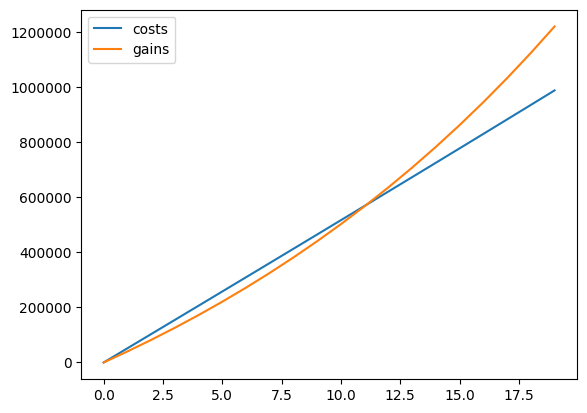

In [375]:
 chart_costs(20)

## determine monthly costs

In [303]:
# Monthly cost Sum of Monthly Payments
monthlyTotal=mortgageMonthly+insuranceMonthly+taxMonthly+HOA
monthlyTotal

6041.5

In [306]:
mortgageMonthly
insuranceMonthly
taxMonthly

1228.0000000000002

In [292]:
totalSpent=(monthlyTotal*years*12)
totalGained=growth

In [293]:
growth-totalSpent

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [328]:
def calculate_amortization_schedule(loan_amount, annual_rate, loan_term_years):
    """
    Calculates and returns the amortization schedule for a fixed-rate mortgage.
    
    :param loan_amount: Initial mortgage loan amount
    :param annual_rate: Annual interest rate (in percent)
    :param loan_term_years: Loan term in years
    :return: List of dicts representing the amortization schedule
    """
    monthly_rate = annual_rate / 100 / 12
    total_payments = loan_term_years * 12

    # Calculate fixed monthly mortgage payment
    monthly_payment = loan_amount * monthly_rate / (1 - (1 + monthly_rate) ** -total_payments)

    schedule = []
    balance = loan_amount

    for month in range(1, total_payments + 1):
        interest = balance * monthly_rate
        principal = monthly_payment - interest
        balance -= principal

        schedule.append({
            "Month": month,
            "Payment": round(monthly_payment, 2),
            "Principal": round(principal, 2),
            "Interest": round(interest, 2),
            "Balance": round(balance if balance > 0 else 0, 2)
        })

    return schedule


# Example usage:
loan = 100000         # $600,000 mortgage
rate = 1            # 5% annual interest rate
term = 30             # 30-year mortgage

schedule = calculate_amortization_schedule(loan, rate, term)

# Print the first 12 months
for entry in schedule[:360]:
    print(entry)

# Print summary
print(f"\nTotal payments: {len(schedule)} months")
print(f"Final balance: ${schedule[-1]['Balance']}")

{'Month': 1, 'Payment': 321.64, 'Principal': 238.31, 'Interest': 83.33, 'Balance': 99761.69}
{'Month': 2, 'Payment': 321.64, 'Principal': 238.5, 'Interest': 83.13, 'Balance': 99523.19}
{'Month': 3, 'Payment': 321.64, 'Principal': 238.7, 'Interest': 82.94, 'Balance': 99284.49}
{'Month': 4, 'Payment': 321.64, 'Principal': 238.9, 'Interest': 82.74, 'Balance': 99045.58}
{'Month': 5, 'Payment': 321.64, 'Principal': 239.1, 'Interest': 82.54, 'Balance': 98806.48}
{'Month': 6, 'Payment': 321.64, 'Principal': 239.3, 'Interest': 82.34, 'Balance': 98567.18}
{'Month': 7, 'Payment': 321.64, 'Principal': 239.5, 'Interest': 82.14, 'Balance': 98327.68}
{'Month': 8, 'Payment': 321.64, 'Principal': 239.7, 'Interest': 81.94, 'Balance': 98087.98}
{'Month': 9, 'Payment': 321.64, 'Principal': 239.9, 'Interest': 81.74, 'Balance': 97848.08}
{'Month': 10, 'Payment': 321.64, 'Principal': 240.1, 'Interest': 81.54, 'Balance': 97607.98}
{'Month': 11, 'Payment': 321.64, 'Principal': 240.3, 'Interest': 81.34, 'Balan

In [333]:
def get_values_from_key(list_of_dictionaries, key):
    """
    Extracts all values associated with a specific key from a list of dictionaries.

    Args:
        list_of_dictionaries: A list of dictionaries.
        key: The key to extract values for.

    Returns:
        A list containing all values associated with the given key.
    """
    return [dictionary[key] for dictionary in list_of_dictionaries if key in dictionary]


In [334]:
get_values_from_key(schedule,"Month")


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
#def calc_growth(price,pctAnnualGrowth,y):
 #   growth=pctAnnualGrowth*price*y
  #  return growth